In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
print(dataset.shape)

(34857, 21)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

In [7]:
for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category')
    

In [8]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\vijaykumarj\AppData\Local\Programs\Python\P

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [10]:
num_cats = ['Postcode']  

In [11]:
for colname in num_cats:
    dataset[colname] = dataset[colname].astype('category')  

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [13]:
#Duplicate Variables
#According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has,
#but reported from different sources. I will investigate these columns further to determine if one should be removed 
#from the dataset.
# Examine Rooms v Bedroom2



dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


In [14]:
#The differences between these variables are minimal so keeping both would only be duplicating information.
#Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.
# Drop columns
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)

C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_4032\1115767775.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)


In [15]:
#Feature Engineering
#The dataset contains the year the home was built. Although this is being measured by the specific year, what this
#variable is really probing is the age of the home. As such, home age can be expressed in terms of historic
#(greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a
#more condensed way, allowing for better analysis and visualization.
# Add age variable
dataset['Age'] = 2017 - dataset['YearBuilt']

# Identify historic homes
dataset['Historic'] = np.where(dataset['Age']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

In [16]:
#MISSING DATA
#Based on a quick look at the number of entries for each variable, there appears to be missing information in the dataset.
#I will explore which features are missing the most information.
## Number of entries
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

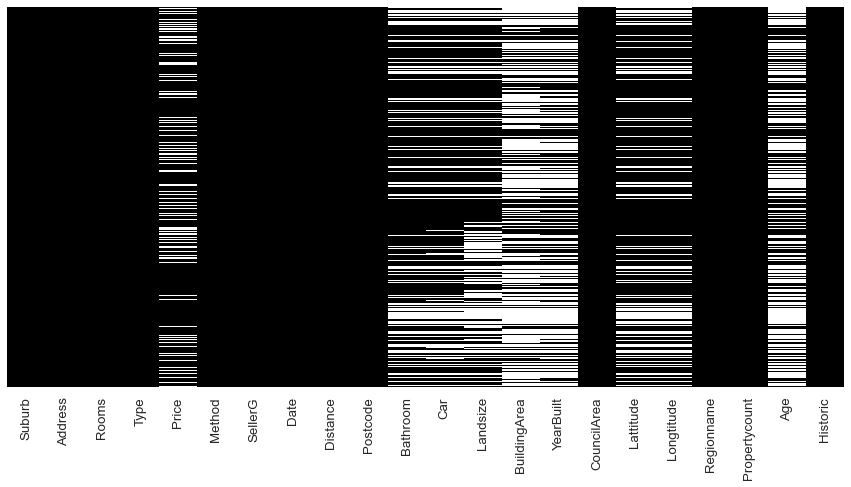

In [19]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [21]:
#Count of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [22]:
## Percentage of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

In [24]:
#There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area,
#Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from
#the dataset.

# View missing data
#dataset[dataset['Bedroom2'].isnull()]
#To remove rows missing data in a specific column 
# dataset =dataset[pd.notnull(dataset['Price'])]

# To remove an entire column
#dataset = dataset.drop('Bedroom2',axis = 1)


dataset = dataset.dropna()

In [25]:
## Confirm that observations missing data were removed  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 

In [26]:
#OUTLIERS
#The statistical summary revealed minimum values of zero for Landsize and BuildingArea that seem odd.
#Also, there is a max price of $8.4 million in the dataset. 
#These observations will need to be investigated further to determine their validity and
#whether they should be included in the dataset for analysis.


dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8887.0,-3.780450e+01,0.090549,-38.17436,-37.85856,-37.7987,-3.774894e+01,-3.740720e+01
Longtitude,8887.0,1.449914e+02,0.118919,144.42379,144.92000,144.9985,1.450646e+02,1.455264e+02


In [27]:
dataset[dataset['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [28]:
dataset[dataset['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,17.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,...,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,68.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,...,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,47.0,Contemporary
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,...,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,17.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,...,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,17.0,Contemporary
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,...,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,15.0,Contemporary
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,...,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,57.0,Historic
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,...,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,57.0,Historic
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,...,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,97.0,Historic
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,...,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,52.0,Historic


In [29]:
dataset[dataset['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,...,0.0,64.00,1965.0,Melbourne City Council,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,...,0.0,82.00,1930.0,Port Phillip City Council,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,...,0.0,66.32,1980.0,Brimbank City Council,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,...,0.0,35.64,1967.0,Hobsons Bay City Council,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


In [30]:
#After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential
#real estate in which the structure comes up to or very near the edge of the property line. Therefore, 
#these observations are valid and will remain the data set.

#However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to
#have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier),
#further confirming a possible error in the data point. For these two reasons, this observation will be removed.


dataset = dataset[dataset['BuildingArea']!=0]


In [31]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8842.0,3.096811e+00,0.964072,1.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


C:\Users\vijaykumarj\AppData\Local\Temp\ipykernel_4032\1197244986.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))


<AxesSubplot:xlabel='Price'>

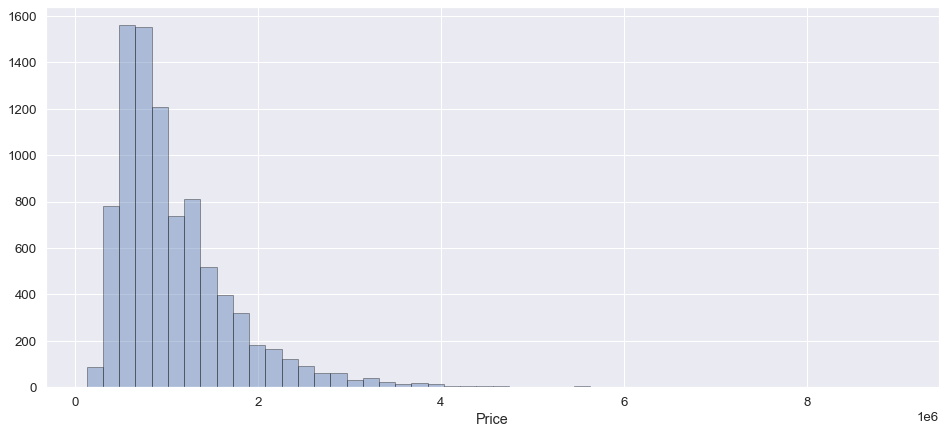

In [32]:
#UNIVARIATE
#The dependent (or target) variable we are trying to predict in this analysis is Price.
#This variable appears to be normally distributed and skewed to the right. That is, the majority of homes around $900k
#with some outliers around $8M.


plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))


In [ ]:
#Categorical Features
#Next, I'll take a look at the relationships between the target variable and the categorical features.
#Suburb, Address, and Postcode are measures based on location. Rather than using all of these features in the analysis, 
#Regionname would be the best proxy of home location to use for analysis that gets to the heart of this information 
#in a more condensed way.

#Based on domain knowledge, a home's real estate agent or council member has a minimal effect on a price relative to other
#features and will be excluded from further analysis.

In [33]:
 #Identify categorical features
dataset.select_dtypes(['category']).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [34]:
# Abbreviate Regionname categories
dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

In [ ]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,0]
sns.boxplot(x = 'Historic', y = 'Price', data = dataset, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

In [35]:
#Numeric Features
#Next, I visualize the relationships between numeric features in the dataset and price.

# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns


Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [ ]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

axes[3,0].scatter(x = 'Age', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()


Text(0.5, 1.0, 'Variable Correlation')

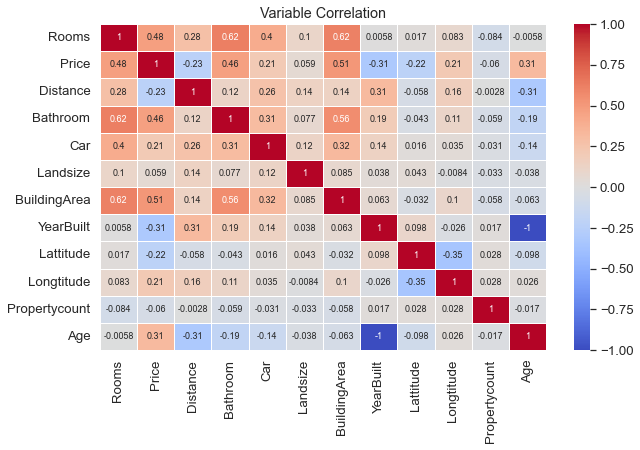

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [ ]:
 #Split
# Create features variable 
X =dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = dataset['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))